In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
# from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [5]:
fashion_train.shape

(60000, 785)

In [3]:
x_train_fashion=fashion_train.drop("label",axis=1)
y_train_fashion=fashion_train["label"]
x_test_fashion=fashion_test.drop("label",axis=1)
y_test_fashion=fashion_test["label"]

In [6]:
# reshaping input
x_train_reshape=x_train_fashion.values.reshape(-1,28,28) #  -1 used to reshape the flattened array back into a 28x28 grid.
x_test_reshape=x_test_fashion.values.reshape(-1,28,28)

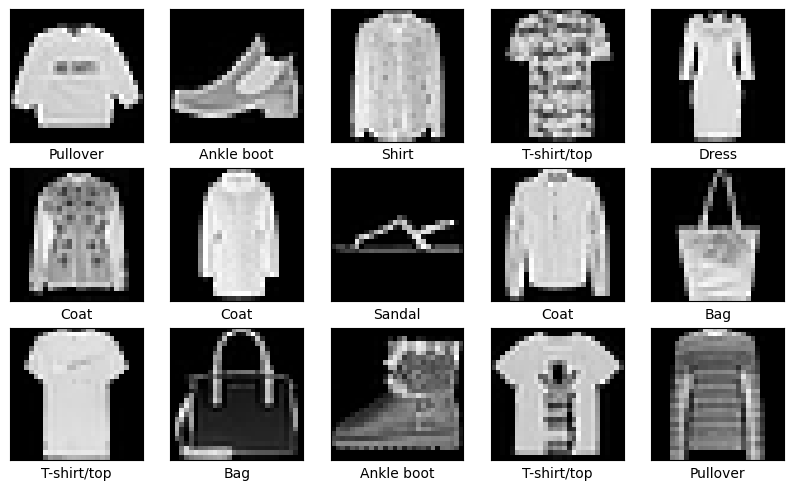

In [8]:
# Number of clothing accessories in order
col_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i],cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])

plt.show()

In [10]:
y_train_fashion[0]

2

In [11]:
# ANN accepts one hot encoding format as output
y_train_fashion=to_categorical(y_train_fashion,num_classes=10)
y_test_fashion=to_categorical(y_test_fashion,num_classes=10)

In [12]:
# Creating base neural network
model=keras.Sequential([
    layers.Dense( 256, activation='relu',input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# param = output neurons * (input neurons + 1)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,754 (874.04 KB)

 Trainable params: 222,986 (871.04 KB)

 Non-trainable params: 768 (3.00 KB)

In [14]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

history=model.fit(x_train_fashion, y_train_fashion, batch_size=100, epochs=10, 
                  validation_data=(x_test_fashion,y_test_fashion) )

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.6460 - loss: 1.0285 - val_accuracy: 0.8248 - val_loss: 0.4937
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.8088 - loss: 0.5520 - val_accuracy: 0.8407 - val_loss: 0.4353
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.8253 - loss: 0.5058 - val_accuracy: 0.8459 - val_loss: 0.4237
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.8327 - loss: 0.4817 - val_accuracy: 0.8666 - val_loss: 0.3960
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.8427 - loss: 0.4538 - val_accuracy: 0.8629 - val_loss: 0.4105
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.8466 - loss: 0.4480 - val_accuracy: 0.8528 - val_loss: 0.4052
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.8480 - loss: 0.4416 - val_accuracy: 0.8665 - val_loss: 0.3837
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.8504 - loss: 0.4296 - 

In [16]:
test_loss_fashion, test_acc_fashion = model.evaluate(x_test_fashion, y_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8661 - loss: 0.3837


In [17]:
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.8718


In [18]:
# Predicting the labels-DIGIT
y_predict=model.predict(x_test_fashion)
# getting maximium value in predicted vector
y_predicts=np.argmax(y_predict , axis=1)
y_test_fashion_eval=np.argmax(y_test_fashion, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_7140\4197025269.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


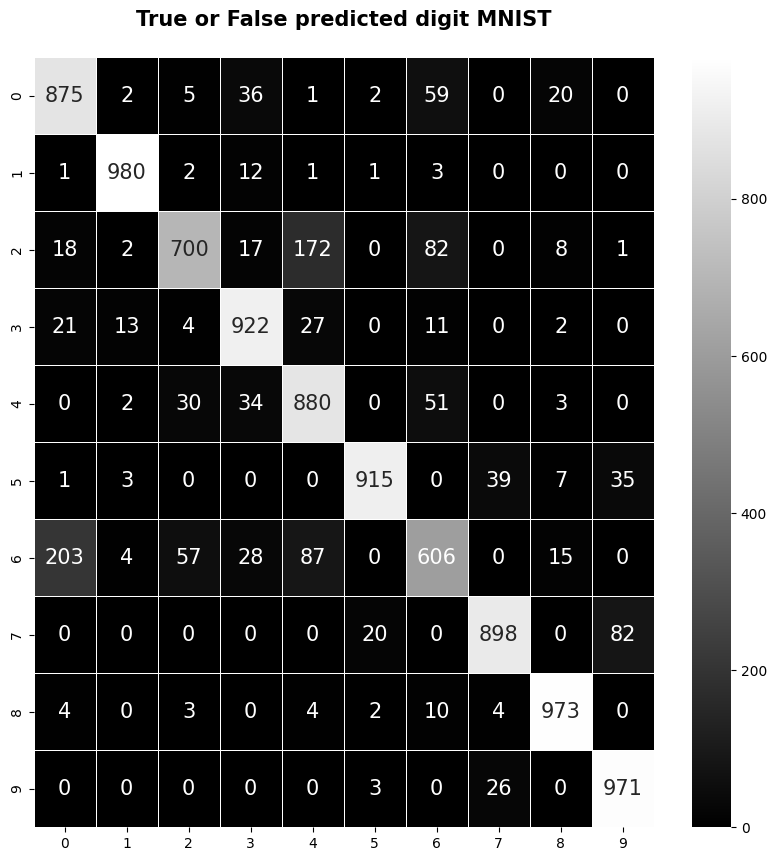

In [19]:
#Confusion matrix for fashion MNIST
con_mat=confusion_matrix(y_test_fashion_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fashion_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82      1000
           1       0.97      0.98      0.98      1000
           2       0.87      0.70      0.78      1000
           3       0.88      0.92      0.90      1000
           4       0.75      0.88      0.81      1000
           5       0.97      0.92      0.94      1000
           6       0.74      0.61      0.67      1000
           7       0.93      0.90      0.91      1000
           8       0.95      0.97      0.96      1000
           9       0.89      0.97      0.93      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [21]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


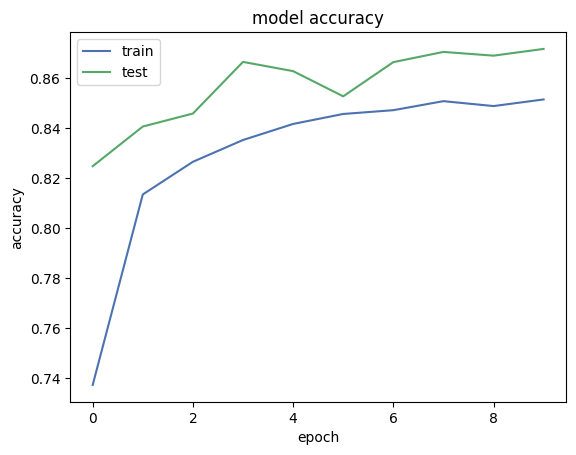

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy']) # plot the accuracy stored in history object during fit() is called
plt.plot(history.history['val_accuracy']) # plot the val_accuracy stored in history object during fit() is called
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

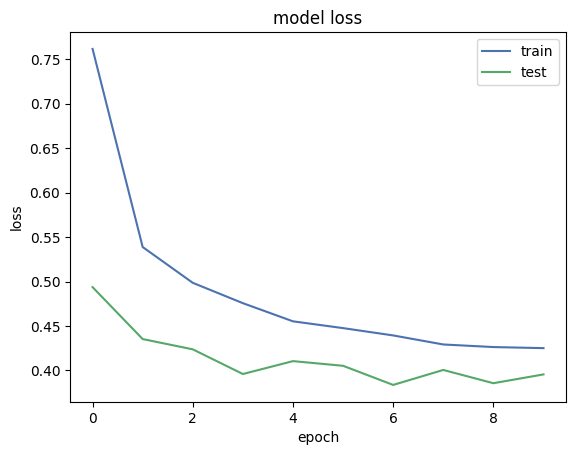

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [25]:
y_predict_single=model.predict(x_test_fashion.loc[[0],:].values)
y_predicts_single=np.argmax(y_predict_single, axis=1)
y_test_fashion_eval=np.argmax(y_test_fashion, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


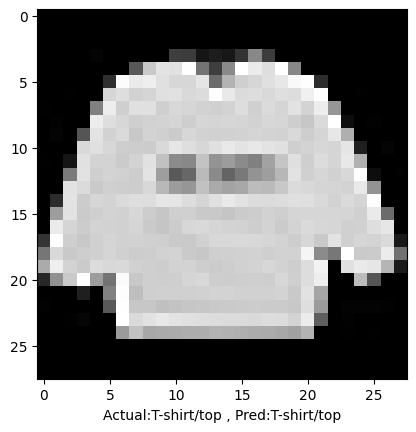

In [28]:
#Names of numbers in the dataset in order
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(x_train_reshape[0], cmap='gray')
plt.xlabel("Actual:{} , Pred:{}".format(col_names[y_test_fashion_eval[0]],col_names[y_predicts_single[0]]))
plt.show()